In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
yes_no_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

### encoding yes_no values

In [5]:
for col in yes_no_cols:
    data[col] = data[col].map(lambda x: 1 if x == 'yes' else 0)

In [6]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [7]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

encoded_array = encoder.fit_transform(data[['furnishingstatus']])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['furnishingstatus']))

data = pd.concat([data, encoded_df], axis=1)
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,1.0,0.0,0.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,1.0,0.0,0.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,0.0,1.0,0.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,1.0,0.0,0.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,0.0,0.0,1.0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,0.0,1.0,0.0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,0.0,0.0,1.0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,1.0,0.0,0.0


In [10]:
data.rename(columns={
    "furnishingstatus_furnished": "furnished",
    "furnishingstatus_semi-furnished": "semi-furnished",
    "furnishingstatus_unfurnished" : "unfurnished"
}, inplace=True)
data.drop('furnishingstatus', axis=1, inplace=True)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0,0.0,0.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0,0.0,0.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.0,1.0,0.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0,0.0,0.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0,0.0,0.0


### Scaling the data

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = data.copy()

x = scaler.fit_transform(X)

In [12]:
dfx = pd.DataFrame(x, columns=X.columns)
dfx

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,4.566365,1.046726,1.403419,1.421812,1.378217,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.517692,1.804941,1.700840,-0.844888,-0.696429
1,4.004484,1.757010,1.403419,5.405809,2.532024,0.405623,-0.465315,-0.734539,-0.219265,1.472618,2.679409,-0.554035,1.700840,-0.844888,-0.696429
2,4.004484,2.218232,0.047278,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,1.804941,-0.587945,1.183588,-0.696429
3,3.985755,1.083624,1.403419,1.421812,0.224410,0.405623,-0.465315,1.361397,-0.219265,1.472618,2.679409,1.804941,1.700840,-0.844888,-0.696429
4,3.554979,1.046726,1.403419,-0.570187,0.224410,0.405623,2.149083,1.361397,-0.219265,1.472618,1.517692,-0.554035,1.700840,-0.844888,-0.696429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,-1.576868,-0.991879,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.517692,-0.554035,-0.587945,-0.844888,1.435896
541,-1.605149,-1.268613,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-0.587945,1.183588,-0.696429
542,-1.614327,-0.705921,-1.308863,-0.570187,-0.929397,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,-0.587945,-0.844888,1.435896
543,-1.614327,-1.033389,0.047278,-0.570187,-0.929397,-2.465344,-0.465315,-0.734539,-0.219265,-0.679063,-0.805741,-0.554035,1.700840,-0.844888,-0.696429


### Applying PCA

In [13]:
from sklearn.decomposition import PCA

pca = PCA(random_state=100)

pca.fit(x)

PCA(random_state=100)

In [14]:
pca.components_

array([[ 4.88035207e-01,  3.30350204e-01,  2.76430665e-01,
         3.17226960e-01,  2.64310710e-01,  2.15702594e-01,
         1.95040803e-01,  1.41777852e-01,  2.65705555e-02,
         2.84232523e-01,  2.64711288e-01,  2.16401908e-01,
         2.08505603e-01,  4.30953830e-02, -2.39553994e-01],
       [-9.92489806e-03, -4.19442138e-02,  1.27981136e-02,
        -2.28971740e-03, -1.14280185e-01, -2.49148777e-02,
         2.92287087e-02,  1.28878082e-01,  1.64684400e-01,
        -1.75141916e-01,  3.57096247e-02, -3.37538917e-02,
        -3.50681080e-01,  7.53223338e-01, -4.65076115e-01],
       [-4.73439893e-02,  1.40281938e-01, -3.55354469e-01,
        -2.80831425e-01, -4.85417417e-01,  2.13796128e-01,
         3.30122595e-01,  4.45815962e-01, -1.10755175e-01,
        -8.37389564e-02,  6.33253436e-02,  3.25953102e-01,
         1.96128581e-01, -9.00237566e-02, -8.80888268e-02],
       [ 5.85215836e-03, -2.69190719e-01,  2.82420325e-01,
         2.30434582e-01,  7.37603310e-02, -3.62601156

In [15]:
pca.explained_variance_ratio_

array([2.19151381e-01, 1.08797294e-01, 1.03030822e-01, 8.57309443e-02,
       7.92022821e-02, 7.24813813e-02, 5.92605699e-02, 5.48008742e-02,
       4.98145590e-02, 4.35296809e-02, 4.24462464e-02, 3.82229763e-02,
       2.81343021e-02, 1.53966867e-02, 3.80215439e-33])

<BarContainer object of 15 artists>

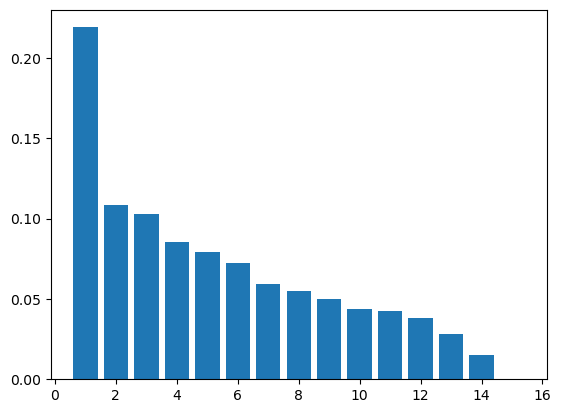

In [16]:
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [17]:
var_cumsum = np.cumsum(pca.explained_variance_ratio_)

In [18]:
var_cumsum

array([0.21915138, 0.32794867, 0.4309795 , 0.51671044, 0.59591272,
       0.6683941 , 0.72765467, 0.78245555, 0.83227011, 0.87579979,
       0.91824603, 0.95646901, 0.98460331, 1.        , 1.        ])

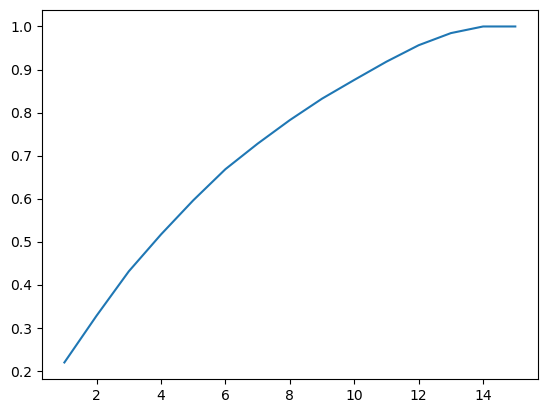

In [19]:
plt.plot(range(1, len(var_cumsum)+1), var_cumsum)

#### PCA with 8 components

In [20]:
pc2 = PCA(n_components=8, random_state=100)

In [21]:
new_data = pc2.fit_transform(x)

In [26]:
df_last = pd.DataFrame(new_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])

In [27]:
df_last.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,5.360332,-1.560098,-0.974329,-0.919384,-0.012491,-0.114284,0.092089,-1.153379
1,6.686584,-1.604185,-3.222347,-0.715691,0.481525,0.929379,-1.753258,-0.381354
2,4.089053,1.488341,0.741677,-0.366924,-1.755824,0.989973,-0.306814,-1.672799
3,5.388877,-1.112422,0.626381,-0.399927,0.045255,0.651308,-1.123541,-1.590506
4,4.226446,-0.987482,1.221606,0.509704,0.781399,0.078920,-1.319190,1.244051
